# Question 1

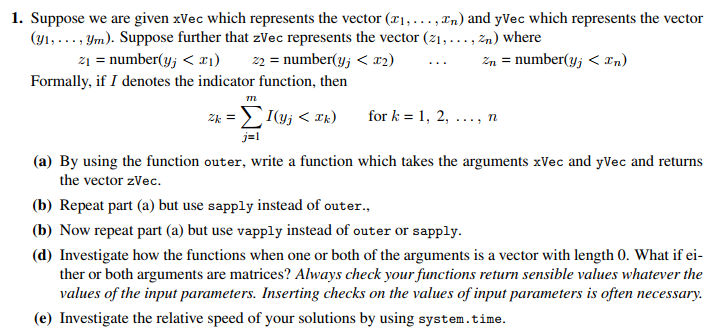

In [25]:
fun4q1a <- function(xVec, yVec){
    colSums( outer(yVec, xVec, "<") )
}

In [26]:
fun4q1b <- function(xVec, yVec){
    rowSums( sapply(yVec, FUN=function(y){y < xVec}) )
}

c)

In [27]:
fun4q1c <- function(xVec, yVec){
    rowSums( vapply(yVec, FUN=function(y){y<xVec}, FUN.VALUE=seq(along=xVec)) )
}

In [28]:
fun4q1d <- function(xVec,yVec)
{
    leny <- length(yVec)
    mat <- matrix(rep(xVec,leny), byrow=T, nrow=leny)
    apply( yVec<mat, 2, sum )
}

d)  Both fun4q1b and fun4q1d fail if either xVec or yVec has length 0; but at least they do not give incorrect
answers which would be far worse. Both fun4q1a and fun4q1d fail if xVec and yVec are matrices.

e)

In [29]:
rjr1 <- rnorm(10000)
rjr2 <- rnorm(12000)
system.time(fun4q1a(rjr1,rjr2))
system.time(fun4q1b(rjr1,rjr2))
system.time(fun4q1c(rjr1,rjr2))
system.time(fun4q1d(rjr1,rjr2))

   user  system elapsed 
   0.80    0.12    1.41 

   user  system elapsed 
   0.83    0.24    1.48 

   user  system elapsed 
   0.80    0.38    1.43 

   user  system elapsed 
   2.70    0.84    4.53 

# Question 2

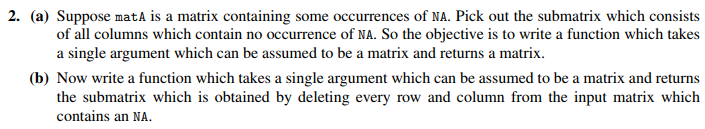

In [30]:
tmpFn <- function(mat){
    mat[, !apply(is.na(mat), 2, any), drop = F]
}

In [31]:
tmpFn2 <- function(mat){
    mat[!apply(is.na(mat), 1, any), !apply(is.na(mat), 2, any), drop = F]
}

# Question 3

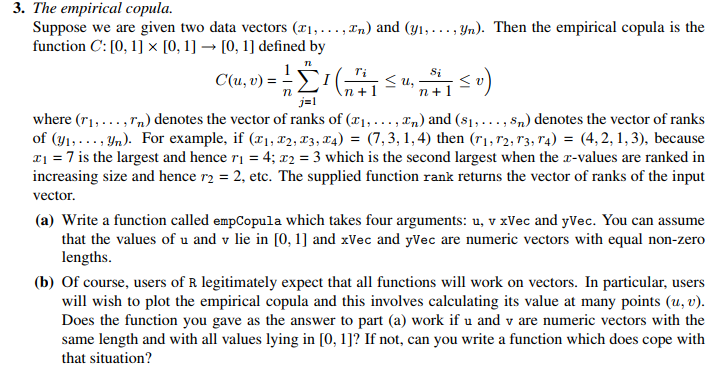

In [32]:
empCopula <- function( u, v, xVec, yVec )
{
    n <- length(xVec)
    rVecN <- rank(xVec)/(n+1)
    sVecN <- rank(yVec)/(n+1)
    sum( (rVecN <= u) & (sVecN <= v) ) /n
}

b)

In [33]:
empCopula2 <- function( u, v, xVec, yVec )
{
    n <- length(xVec)
    rVecN <- rank(xVec)/(n+1)
    sVecN <- rank(yVec)/(n+1)
    valuesN <- colSums( outer(rVecN, u, "<=")&outer(sVecN, v, "<=") )
    cbind( uCoord = u, vCoord = v, empCop=valuesN/n )
}

In [34]:
empCopula3 <- function( u, v, xVec, yVec )
{
    n <- length(xVec)
    rVecN <- rank(xVec)/(n+1)
    sVecN <- rank(yVec)/(n+1)
    tempf <- function(uv){
        sum( (rVecN <= uv[1]) * (sVecN <= uv[2]) )
    }
    valuesN <- apply( cbind(u,v), 1, tempf )
    cbind( uCoord = u, vCoord = v, empCop=valuesN/n )
}

# Question 4

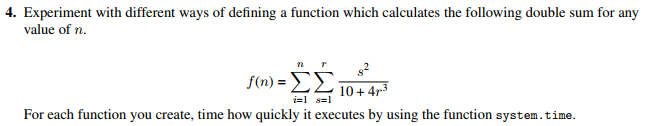
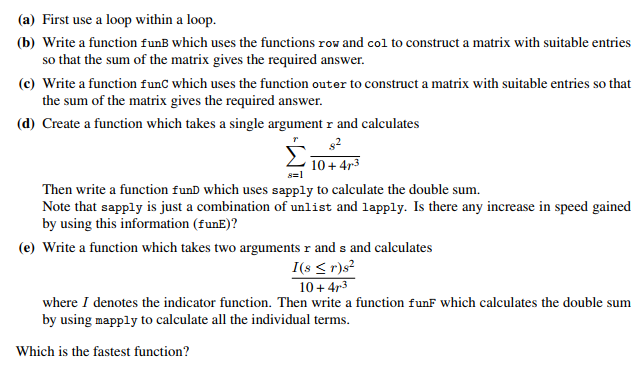

a)

In [35]:
funA <- function (n)
{
    su <- 0
    for(r in 1:n)
    {
        for(s in 1:r)
        su <- su+s^2/(10+4*r^3)
    }
    su
}

b)

In [36]:
funB <- function (n)
{
    mat <- matrix(0, ncol=n, nrow=n)
    sum( (col(mat)^2)/(10+4*row(mat)^3)*(col(mat)<=row(mat)))
}

c)

In [37]:
funC <- function (n)
{
    sum( outer(1:n,1:n,FUN=function(r,s){ (s<=r)*(s^2)/(10+4*r^3) }) )
}

d)

In [38]:
funD <- function (n)
{
    tmpfn <- function(r){sum(((1:r)^2)/(10+4*r^3))}
    sum(sapply(1:n, FUN=tmpfn))
}

funE <- function (n)
{
    tmpfn <- function(r){sum(((1:r)^2)/(10+4*r^3))}
    sum(unlist(lapply(1:n, FUN=tmpfn)))
}

e)

In [39]:
funF <- function (n)
{
    tmpf <- function(s,r){(s^2)/(10+4*r^3)*(s<=r)}
    sum(mapply(tmpf, rep(1:n, times=rep(n,n)), 1:n))
}

# Question 5

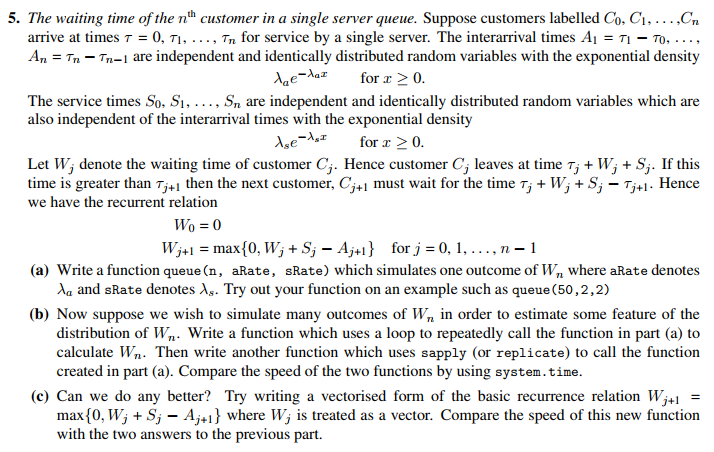

In [40]:
queue1 <- function(n, aRate, sRate)
{
    w <- 0
    for(i in 1:n){
        w <- max(0, w+rexp(1,sRate)-rexp(1,aRate))
    }
    w
}
queue2 <- function(n, aRate, sRate)
{
    w <- 0
    s <- rexp(n, sRate)
    a <- rexp(n, aRate)
    for(i in 1:n){
        w <- max(0, w+s[i]-a[i])
    }
    w
}

b)

In [42]:
queueRep1 <- function (nReps, n, aRate, sRate)
{
    wVec <- rep(NA, nReps)
    for(j in 1:nReps)
        wVec[j] <- queue2(n, aRate, sRate)
    wVec
}
queueRep2 <- function (nReps, n, aRate, sRate)
{
    sapply(  rep(n,nReps), queue2, aRate, sRate )
}

c)

In [45]:
queueRep3 <- function (nReps, n, aRate, sRate)
{
    w <- rep(0, nReps)
    s <- matrix(rexp(n*nReps, sRate), ncol=nReps)
    a <- matrix(rexp(n*nReps, aRate), ncol=nReps)
    for(i in 1:n){
        w <- pmax(0, w+s[i,]-a[i,])
    }
    w
}

# Question 6

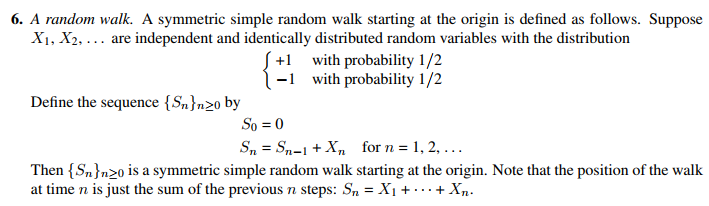
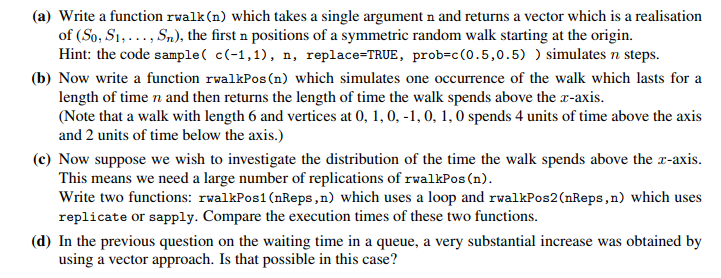

In [46]:
rwalk <- function(n)
{
    c( 0, cumsum(sample( c(-1,1), n, replace=TRUE, prob=c(0.5,0.5))) )
}

In [47]:
rwalkPos <- function(n)
{
    rw <- cumsum(c(0, sample( c(-1,1), n, replace=TRUE, prob=c(0.5,0.5))))
    sum( (rw[-(n+1)] + rw[-1]) > 0 )
}

In [48]:
rwalkPos1 <- function(nReps, n)
{
    results <- rep(NA, nReps)
    for(i in 1:nReps)
        results[i]<-rwalkPos(n)
    results
}
rwalkPos2 <- function(nReps, n)
{
    replicate( nReps, rwalkPos(n) )
}

In [49]:
rwalkPos3 <- function(nReps, n)
{
    stepWalks <- matrix( sample( c(-1,1), n, replace=TRUE, prob=c(0.5,0.5)), nr=nReps )
    for(j in 2:n)
        stepWalks[,j] <- stepWalks[,j] + stepWalks[,j-1]
    stepWalks <- cbind(0, stepWalks)
    rowSums( stepWalks[,1:n] + stepWalks[,2:(n+1)]>0 )
}